In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df['Insulin'].value_counts()

Insulin
0      374
105     11
130      9
140      9
120      8
      ... 
178      1
127      1
510      1
16       1
112      1
Name: count, Length: 186, dtype: int64

In [9]:
df['BloodPressure'].value_counts()

BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
54     11
52     11
92      8
75      8
65      7
85      6
94      6
48      5
44      4
96      4
110     3
106     3
100     3
98      3
30      2
46      2
55      2
104     2
108     2
40      1
122     1
95      1
102     1
61      1
24      1
38      1
114     1
Name: count, dtype: int64

In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
# most probably there can be 0 in pregnancy hormones but others do not make sense. let's check them automatically.
# you can use generative ai at this point to ask for guidance if you are not sure and if you don't have a domain expert at hand

columns_to_check = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in columns_to_check:
    zero_count = (df[col] == 0).sum()
    zero_percentage = 100 * zero_count /len(df)
    print(f"{col}: {zero_count} %{zero_percentage:.2f}")

Glucose: 5 %0.65
BloodPressure: 35 %4.56
SkinThickness: 227 %29.56
Insulin: 374 %48.70
BMI: 11 %1.43


In [12]:
# we can drop insulin and fill out the others with median or just do the same thing with insulin
# insulin can be an important factor, so i won't drop it unless i can get a confirmation from a domain expert
# i will fill this out after i check the correlation and do test-train split to avoid data leakage

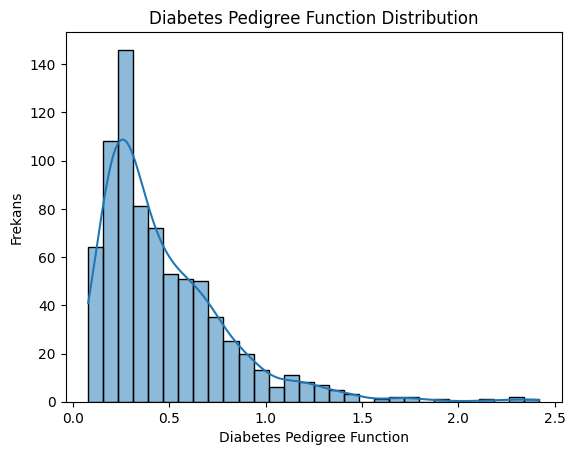

In [13]:
sns.histplot(df['DiabetesPedigreeFunction'], bins=30, kde=True)
plt.title('Diabetes Pedigree Function Distribution')
plt.xlabel('Diabetes Pedigree Function')
plt.ylabel('Frekans')
plt.show()

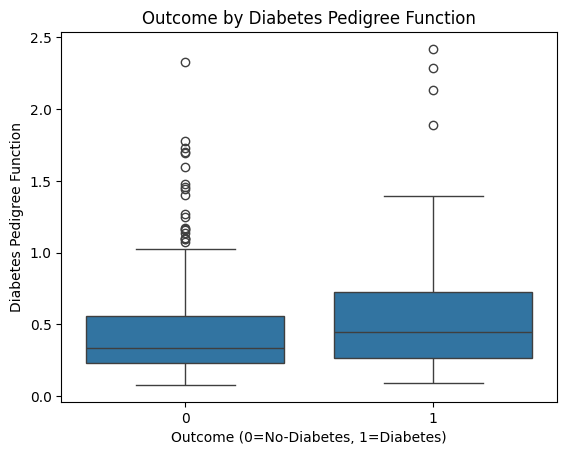

In [14]:
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=df)
plt.title('Outcome by Diabetes Pedigree Function')
plt.xlabel('Outcome (0=No-Diabetes, 1=Diabetes)')
plt.ylabel('Diabetes Pedigree Function')
plt.show()

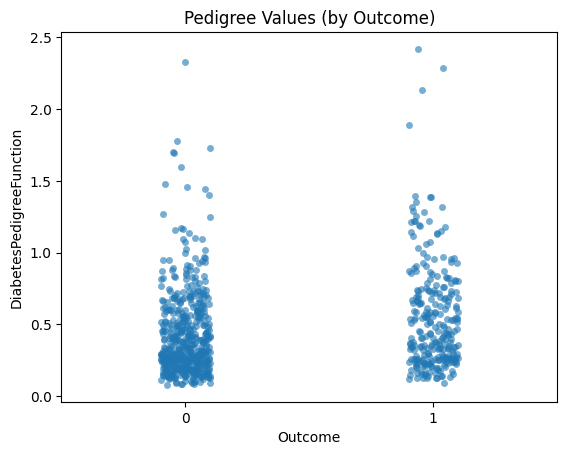

In [15]:
sns.stripplot(x='Outcome', y='DiabetesPedigreeFunction', data=df, jitter=True, alpha=0.6)
plt.title('Pedigree Values (by Outcome)')
plt.show()

In [16]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=15)

In [18]:
columns_to_fill = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

In [19]:
medians = {}
for col in columns_to_fill:
    median_value = X_train[X_train[col] != 0][col].median()
    medians[col] = median_value
    X_train[col] = X_train[col].replace(0, median_value)

for col in columns_to_fill:
    X_test[col] = X_test[col].replace(0, medians[col])

In [20]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.907166,121.560261,72.612378,29.040717,142.477199,32.448208,0.469948,33.285016
std,3.385438,29.974412,12.165642,8.312217,80.879330,6.862948,0.328516,11.678337
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.084000,21.000000
25%,1.000000,100.000000,64.000000,25.000000,125.000000,27.600000,0.238250,24.000000
50%,3.000000,117.000000,72.000000,29.000000,129.500000,32.300000,0.370500,29.000000
75%,6.000000,139.750000,80.000000,32.000000,130.000000,36.500000,0.630750,40.000000
max,17.000000,199.000000,122.000000,63.000000,680.000000,67.100000,2.420000,81.000000


In [21]:
X_test.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,3.597403,122.038961,71.487013,29.376623,144.402597,32.483117,0.479565,33.064935
std,3.304818,32.320876,11.813495,10.513035,104.291511,6.946159,0.343303,12.118519
min,0.000000,61.000000,30.000000,7.000000,23.000000,18.400000,0.078000,21.000000
25%,1.000000,95.250000,64.000000,23.250000,108.250000,26.925000,0.254000,24.000000
50%,3.000000,117.000000,72.000000,29.000000,129.500000,32.300000,0.376500,28.000000
75%,5.750000,142.750000,80.000000,33.750000,129.500000,36.950000,0.603750,41.000000
max,13.000000,197.000000,106.000000,99.000000,846.000000,55.000000,2.329000,69.000000


In [22]:
# scaler is not important in tree algorithms but they are important in regression, logistic regression etc.
# where we measure distance and use gradient descent. we do not need to do standardscaler but if you want you can
# use it anyway. if you comment this out you will see you will get the same result. if you will use alternative
# algorithms with adaboost, maybe it makes sense to use standardscaler

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [25]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

In [26]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       108
           1       0.58      0.63      0.60        46

    accuracy                           0.75       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.76      0.75      0.76       154

0.7532467532467533
[[87 21]
 [17 29]]


In [27]:
#hyperparameter tuning

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
adaboost_param = {
        "n_estimators" : [50, 70, 100, 120, 150, 200],
        "learning_rate" : [0.001, 0.01, 0.1, 1, 10]
}

In [30]:
grid = GridSearchCV(estimator = AdaBoostClassifier(), param_grid = adaboost_param, cv = 5, verbose = 1, n_jobs = -1)

In [31]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


,estimator,AdaBoostClassifier()
,param_grid,"{'learning_rate': [0.001, 0.01, ...], 'n_estimators': [50, 70, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,estimator,None


In [32]:
grid.best_params_

{'learning_rate': 1, 'n_estimators': 150}

In [33]:
ada = AdaBoostClassifier(learning_rate=1, n_estimators=150)

In [34]:
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       108
           1       0.59      0.65      0.62        46

    accuracy                           0.76       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.77      0.76      0.76       154

0.7597402597402597
[[87 21]
 [16 30]]


In [35]:
from sklearn.tree import DecisionTreeClassifier
#hyperparameter tuning
param = {
    "criterion" : ["gini", "entropy", "log_loss"],
    "splitter" : ["best", "random"],
    "max_depth" : [1,2,3,4,5,15,None],
    "max_features" : ["sqrt", "log2", None]
}

In [36]:
from sklearn.model_selection import GridSearchCV
from tqdm_joblib import tqdm_joblib
from tqdm import tqdm

d:\Project\DataScienceMachineLearning\MachineLearning\venv\Lib\site-packages\tqdm_joblib\__init__.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [37]:
total_combinations = np.prod([len(v) for v in param.values()])
n_fits = total_combinations * 5
grid = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid=param, cv=5,scoring="accuracy")

In [38]:
with tqdm_joblib(tqdm(desc="Decision Tree Optimizasyonu", total=n_fits)) as progress_bar:
   grid.fit(X_train, y_train)

Decision Tree Optimizasyonu:   0%|          | 0/630 [00:00<?, ?it/s]

  0%|          | 0/630 [00:00<?, ?it/s]

In [39]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'splitter': 'best'}

In [41]:
y_pred = grid.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7272727272727273
[[85 23]
 [19 27]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       108
           1       0.54      0.59      0.56        46

    accuracy                           0.73       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.73      0.73      0.73       154



In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
classifier=KNeighborsClassifier(n_neighbors=5,algorithm='auto')
classifier.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [44]:
y_pred=classifier.predict(X_test)
print("confusion matrix: \n ", confusion_matrix(y_pred,y_test))
print("accuracy score: ", accuracy_score(y_pred,y_test))
print("classification report: ", classification_report(y_pred,y_test))

confusion matrix: 
  [[81 20]
 [27 26]]
accuracy score:  0.6948051948051948
classification report:                precision    recall  f1-score   support

           0       0.75      0.80      0.78       101
           1       0.57      0.49      0.53        53

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154



In [45]:
classifier=KNeighborsClassifier(n_neighbors=5,algorithm='kd_tree')
classifier.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'kd_tree'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [46]:
y_pred=classifier.predict(X_test)
print("confusion matrix: \n ", confusion_matrix(y_pred,y_test))
print("accuracy score: ", accuracy_score(y_pred,y_test))
print("classification report: ", classification_report(y_pred,y_test))

confusion matrix: 
  [[81 20]
 [27 26]]
accuracy score:  0.6948051948051948
classification report:                precision    recall  f1-score   support

           0       0.75      0.80      0.78       101
           1       0.57      0.49      0.53        53

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154



In [47]:
classifier=KNeighborsClassifier(n_neighbors=3,algorithm='auto') 
classifier.fit(X_train,y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [48]:
y_pred=classifier.predict(X_test)
print("confusion matrix: \n ", confusion_matrix(y_pred,y_test))
print("accuracy score: ", accuracy_score(y_pred,y_test))
print("classification report: ", classification_report(y_pred,y_test))

confusion matrix: 
  [[82 19]
 [26 27]]
accuracy score:  0.7077922077922078
classification report:                precision    recall  f1-score   support

           0       0.76      0.81      0.78       101
           1       0.59      0.51      0.55        53

    accuracy                           0.71       154
   macro avg       0.67      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



In [49]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [50]:
y_pred = gnb.predict(X_test)
print("confusion matrix: \n ", confusion_matrix(y_pred,y_test))
print("accuracy score: ", accuracy_score(y_pred,y_test))
print("classification report: ", classification_report(y_pred,y_test))

confusion matrix: 
  [[85 20]
 [23 26]]
accuracy score:  0.7207792207792207
classification report:                precision    recall  f1-score   support

           0       0.79      0.81      0.80       105
           1       0.57      0.53      0.55        49

    accuracy                           0.72       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.72      0.72      0.72       154



In [51]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [52]:
y_pred = classifier.predict(X_test)
print("confusion matrix: \n ", confusion_matrix(y_pred,y_test))
print("accuracy score: ", accuracy_score(y_pred,y_test))
print("classification report: ", classification_report(y_pred,y_test))

confusion matrix: 
  [[89 19]
 [19 27]]
accuracy score:  0.7532467532467533
classification report:                precision    recall  f1-score   support

           0       0.82      0.82      0.82       108
           1       0.59      0.59      0.59        46

    accuracy                           0.75       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.75      0.75      0.75       154



In [53]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [54]:
y_pred = classifier.predict(X_test)
print("confusion matrix: \n ", confusion_matrix(y_pred,y_test))
print("accuracy score: ", accuracy_score(y_pred,y_test))
print("classification report: ", classification_report(y_pred,y_test))

confusion matrix: 
  [[87 21]
 [21 25]]
accuracy score:  0.7272727272727273
classification report:                precision    recall  f1-score   support

           0       0.81      0.81      0.81       108
           1       0.54      0.54      0.54        46

    accuracy                           0.73       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.73      0.73      0.73       154



Model                                 Doğruluk (Accuracy) Skoru
AdaBoost (Hiperparametre Ayarlı)                0.7597
AdaBoost (Varsayılan)                           0.7532
Logistic Regression                             0.7532
Decision Tree (Hiperparametre Ayarlı)           0.7272
Support Vector Classifier (SVC)                 0.7272
Gaussian Naive Bayes                            0.7207
"K-Nearest Neighbors (KNN, k=3)"                0.7077
"K-Nearest Neighbors (KNN, k=5)"                0.6948

Model                                  Recall Skoru (Sınıf 1 için)                            Anlamı
AdaBoost (Hiperparametre Ayarlı)                   0.65               Diyabet hastası olan her 100 kişiden 65'ini doğru tahmin etti.
AdaBoost (Varsayılan)                              0.63               Diyabet hastası olan her 100 kişiden 63'ünü doğru tahmin etti.
Decision Tree (Hiperparametre Ayarlı)              0.59               Diyabet hastası olan her 100 kişiden 59'unu doğru tahmin etti.
Logistic Regression                                0.59               Diyabet hastası olan her 100 kişiden 59'unu doğru tahmin etti.
Support Vector Classifier (SVC)                    0.54               Diyabet hastası olan her 100 kişiden 54'ünü doğru tahmin etti.
Gaussian Naive Bayes                               0.53               Diyabet hastası olan her 100 kişiden 53'ünü doğru tahmin etti.
K-Nearest Neighbors (KNN, k=3)                     0.51               Diyabet hastası olan her 100 kişiden 51'ini doğru tahmin etti.
K-Nearest Neighbors (KNN, k=5)                     0.49               Diyabet hastası olan her 100 kişiden 49'unu doğru tahmin etti.